In [ ]:
import numpy as np
from tqdm import tqdm_notebook

# Generate all possible 10-digit binary numbers
def generate_all_binary_numbers():
    binary_numbers = []
    for i in range(2 ** 10):
        binary_str = format(i, '010b')
        binary_numbers.append([int(bit) for bit in binary_str])
    return np.array(binary_numbers)

# Generate all possible binary numbers
all_binary_numbers = generate_all_binary_numbers()

# Shuffle the list


# Define the labels for palindrome or not
def is_palindrome(binary_number):
    return int(np.array_equal(binary_number, binary_number[::-1]))

labels = np.array([is_palindrome(x) for x in all_binary_numbers])
#oversampling technique to balance dataset
'''indices_non_palindrome = np.where(labels == 0)[0]
indices_palindrome = np.where(labels == 1)[0]
num_samples_to_add = len(indices_non_palindrome) - len(indices_palindrome)
indices_to_add = np.random.choice(indices_palindrome, num_samples_to_add, replace=True)
all_binary_numbers= np.concatenate((all_binary_numbers, all_binary_numbers[indices_to_add]))
labels = np.concatenate((labels, labels[indices_to_add]))'''



# Define sigmoid activation function
def sigmoid(x):
    return np.exp(-np.logaddexp(0, -x))
def relu(x):
        return np.maximum(0, x)
def reluDerivative(x):
      x[x<=0] = 0
      x[x>0] = 1
      return x


# Define binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred+1e-6) + (1 - y_true) * np.log(1 - y_pred+1e-6))

# Define the MLP model
class PalindromeClassifier:
    def __init__(self,num_neuron):
        self.num_neuron=num_neuron
        min=-(1/np.sqrt(n))
        max=1/np.sqrt(n)
        self.weights1 = np.random.uniform(min,max,size=(10, self.num_neuron)) #(np.random.rand(10, self.num_neuron) - 1) / 2
        self.weights2 = np.random.uniform(min,max,size=(self.num_neuron, 1)) #(np.random.rand(self.num_neuron, 1) - 1) / 2
        self.velocity_w1 = np.zeros_like(self.weights1)
        self.velocity_w2 = np.zeros_like(self.weights2)

        self.momentum = 0.95  # Momentum parameter



    def forward(self, x):
        #z1 = np.reshape(np.hstack(([1],x[0])),(-1,1))
        z1 = x[0]
        self.layer1 = relu(z1.T.dot(self.weights1))
        #self.layer1_=np.reshape(np.column_stack(([1],self.layer1)),(-1,1))
        self.output = sigmoid(np.dot(self.layer1.T, self.weights2))
        return self.output

    def backward(self, x, y, lr):
        loss = self.output - y
        delta_output = loss #* (self.output * (1 - self.output))
        delta_layer1 = np.reshape(delta_output,(-1,1)).dot(np.reshape(self.layer1,(-1,1)).T)
        #delta_layer1 = np.reshape(delta_output,(-1,1)).dot(np.reshape(np.column_stack(([0],self.layer1)),(-1,1)).T)
        #x_=np.reshape(np.hstack(([1],x[0])),(-1,1))
        x_=np.reshape(x[0],(-1,1))
        #self.layer1_=np.reshape(np.column_stack(([1],self.layer1)),(-1,1))
        #print(self.layer1.shape)
        #print(self.layer1.shape)
        #z1 = np.reshape(np.hstack(([1],x[0])),(-1,1))
        z1 = np.reshape(x[0],(-1,1))
        #delta_input = x_.dot((np.multiply(reluDerivative(z1.T.dot(self.weights1)),np.reshape(np.dot(self.weights2,delta_output),(-1,1))[1:,:].T)))
        delta_input = x_.dot((np.multiply(reluDerivative(z1.T.dot(self.weights1)),np.reshape(np.dot(self.weights2,delta_output),(-1,1)).T)))
 #x_.dot((np.multiply(self.layer1*(1-self.layer1),np.reshape(np.dot(self.weights2,delta_output),(-1,1))[1:,:].T)))

        # Update velocities with momentum

        self.velocity_w2 = self.momentum * self.velocity_w2 + (1 - self.momentum) * delta_layer1.T #np.reshape((np.hstack(([1],self.layer1))),(self.weights2.shape[0],-1)).dot(np.reshape(delta_output,(1,-1)))

        self.velocity_w1 = self.momentum * self.velocity_w1 + (1 - self.momentum) * delta_input #np.reshape((np.hstack(([1],x[0]))),(self.weights1.shape[0],-1)).dot(np.reshape(delta_layer1,(self.weights2.shape[0],-1)).T)[:,1:]

        # Update weights and biases

        self.weights2 -= lr * self.velocity_w2

        self.weights1 -= lr * self.velocity_w1
def precision(predicted,y):
    true_positives = np.sum((predicted == 1) & (y == 1))
    false_positives = np.sum((predicted == 1) & (y == 0))
    false_negatives = np.sum((predicted == 0) & (y == 1))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    return precision
def recall(predicted,y):
  true_positives = np.sum((predicted == 1) & (y == 1))
  false_positives = np.sum((predicted == 1) & (y == 0))
  false_negatives = np.sum((predicted == 0) & (y == 1))
  recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0

  return recall
def accuracy(predicted,y):
   acc=np.mean(predicted == y)
   return acc

def stratified_k_fold_cross_validation(X, y, k):
    """
    Perform stratified k-fold cross-validation.

    Parameters:
    - X: Input features (numpy array or list)
    - y: Target labels (numpy array or list)
    - k: Number of folds (integer)

    Returns:
    - folds: List of tuples (train_indices, test_indices) representing the indices of training and testing samples for each fold
    """

    num_samples = len(X)
    classes = np.unique(y)
    num_classes = len(classes)

    class_indices = [[] for _ in range(num_classes)]
    for i, label in enumerate(y):
        class_indices[label].append(i)

    fold_size = num_samples // k
    class_fold_sizes = np.array([fold_size] * num_classes)
    remainder = num_samples % k
    class_fold_sizes[:remainder] += 1

    for indices in class_indices:
        np.random.shuffle(indices)

    folds = []
    for i in range(k):
        train_indices = []
        test_indices = []

        for j in range(num_classes):
            start_index = sum(class_fold_sizes[:j])
            end_index = start_index + class_fold_sizes[j]

            test_indices.extend(class_indices[j][i*fold_size:(i+1)*fold_size])

            train_indices.extend(class_indices[j][:start_index])
            train_indices.extend(class_indices[j][end_index:])

        np.random.shuffle(train_indices)
        np.random.shuffle(test_indices)

        folds.append((train_indices, test_indices))

    return folds
# Perform 4-fold cross-validation with oversampling and true SGD with momentum
num_folds = 4
#folds = stratified_k_fold_cross_validation(all_binary_numbers, labels, num_folds)

precision_list_train_total = []
recall_list_train_total = []
accuracy_list_train_total=[]

precision_list_test_total = []
recall_list_test_total = []
accuracy_list_test_total=[]
fold_size = all_binary_numbers.shape[0] // num_folds
for fold in range(num_folds):
    print(f"Fold {fold + 1}:")
    # Split data into training and testing sets for this fold
    fold_start = fold * fold_size
    fold_end = (fold + 1) * fold_size
    x_test_fold = all_binary_numbers[fold_start:fold_end]
    y_test_fold = labels[fold_start:fold_end]
    x_train_fold=np.concatenate((all_binary_numbers[:fold * fold_size],all_binary_numbers[(fold + 1) * fold_size:]))
    y_train_fold=np.concatenate((labels[:fold * fold_size],labels[(fold + 1) * fold_size:]))
    precision_list_train = []
    recall_list_train = []
    accuracy_list_train=[]

    precision_list_test = []
    recall_list_test = []
    accuracy_list_test=[]
    '''for fold_idx, (train_indices, test_indices) in enumerate(folds):
    precision_list_train = []
    recall_list_train = []
    accuracy_list_train=[]

    precision_list_test = []
    recall_list_test = []
    accuracy_list_test=[]
    print(f"Fold {fold_idx + 1}:")
    # Oversample the minority class to balance the training set
    indices_non_palindrome = np.where(y_train_fold == 0)[0]
    indices_palindrome = np.where(y_train_fold == 1)[0]
    num_samples_to_add = len(indices_non_palindrome) - len(indices_palindrome)
    indices_to_add = np.random.choice(indices_palindrome, num_samples_to_add, replace=True)
    x_train_fold = np.concatenate((x_train_fold, x_train_fold[indices_to_add]))
    y_train_fold = np.concatenate((y_train_fold, y_train_fold[indices_to_add]))'''

    # Create an instance of the PalindromeClassifier model
    model = PalindromeClassifier(64)

    # Train the model
    num_epochs = 10000
    learning_rate = 1
    num_samples = x_train_fold.shape[0]

    for epoch in tqdm_notebook(range(num_epochs)):
        epoch_loss = 0
        preci_train=0
        rec_train=0
        accu_train=0
        precision_mean_train = 0
        recall_mean_train = 0
        accuracy_mean_train = 0
        precision_mean_test = 0
        recall_mean_test = 0
        accuracy_mean_test = 0
        for i in range(num_samples): #stratify train_indices
            # Select a random sample
            idx = np.random.randint(num_samples)
            inputs = x_train_fold[idx].reshape(1, -1)
            targets = y_train_fold[idx]

            # Forward pass
            output = model.forward(inputs)
            predicted = (output >= 0.5).astype(int)
            preci_train +=precision(predicted,targets)
            rec_train +=recall(predicted,targets)
            accu_train +=accuracy(predicted,targets)
            # Calculate binary cross-entropy loss

            loss = binary_cross_entropy(targets, output)
            epoch_loss += loss

            # Backward pass
            model.backward(inputs, targets, learning_rate)
        train_indices=[i for i in range(num_samples)]
        # Print the average loss for the epoch
        precision_mean_train = preci_train/len(train_indices)
        recall_mean_train = rec_train/len(train_indices)
        accuracy_mean_train = accu_train/len(train_indices)
        #print(f'Epoch {epoch + 1}, Average Loss_train: {epoch_loss / num_samples}, Train Accuracy: {accuracy_mean_train:.4f}, Train Precision: {precision_mean_train:.4f}, Train Recall: {recall_mean_train:.4f}')
        precision_list_train.append(precision_mean_train)
        recall_list_train.append(recall_mean_train)
        accuracy_list_train.append(accuracy_mean_train)
        '''# Test the model after training
        precision_list_train.append(precision_mean)
        recall_list_train.append(recall_mean)

        # Calculate average precision and recall
        avg_precision = np.mean(precision_list)
        avg_recall = np.mean(recall_list)'''
        #print(f'Average Precision: {avg_precision:.4f}, Average Recall: {avg_recall:.4f}')
        preci_test=0
        rec_test=0
        accu_test=0
        for i in range(x_test_fold.shape[0]):                 #test_indices:
            x_test, y_test = x_test_fold[i], y_test_fold[i]
            x_test = x_test.reshape(1, -1)  # Reshape to 2D array
            y_pred = model.forward(x_test)
            predicted = (y_pred >= 0.5).astype(int)
            preci_test +=precision(predicted,y_test)
            rec_test +=recall(predicted,y_test)
            accu_test +=accuracy(predicted,y_test)
        test_indices=[i for i in range(x_test_fold.shape[0])]
        precision_mean_test = preci_test/len(test_indices)
        recall_mean_test = rec_test/len(test_indices)
        accuracy_mean_test = accu_test/len(test_indices)
        #print(f'         Average Loss_Test: {epoch_loss / num_samples}, Test Accuracy: {accuracy_mean_test:.4f}, Test Precision: {precision_mean_test:.4f}, Test Recall: {recall_mean_test:.4f}')
        precision_list_test.append(precision_mean_test)
        recall_list_test.append(recall_mean_test)
        accuracy_list_test.append(accuracy_mean_test)
    avg_precision_train = np.mean(precision_list_train)
    avg_recall_train = np.mean(recall_list_train)
    avg_accuracy_train = np.mean(accuracy_list_train)
    print(f'Fold {fold + 1}, Last Loss_train: {epoch_loss/num_samples }, Train Accuracy: {avg_accuracy_train:.4f}, Train Precision: {avg_precision_train:.4f}, Train Recall: {avg_recall_train:.4f}')
    avg_precision_test = np.mean(precision_list_test)
    avg_recall_test = np.mean(precision_list_test)
    avg_accuracy_test = np.mean(precision_list_test)
    precision_list_train_total.append(avg_precision_train)
    recall_list_train_total.append(avg_recall_train)
    accuracy_list_train_total.append(avg_accuracy_train)
    precision_list_train_total.append(avg_precision_test)
    recall_list_train_total.append(avg_recall_test)
    accuracy_list_train_total.append(avg_accuracy_test)
    print(f'          Test Accuracy: {avg_accuracy_test:.4f}, Test Precision: {avg_precision_test:.4f}, Test Recall: {avg_recall_test:.4f}')
avg_precision_train_total = np.mean(precision_list_train_total)
avg_recall_train_total = np.mean(recall_list_train_total)
avg_accuracy_train_total = np.mean(accuracy_list_train_total)
print(f'Total:  Train Accuracy: {avg_accuracy_train_total:.4f}, Train Precision: {avg_precision_train_total:.4f}, Train Recall: {avg_recall_train_total:.4f}')
avg_precision_train_total = np.mean(precision_list_test_total)
avg_recall_train_total = np.mean(recall_list_test_total)
avg_accuracy_train_total = np.mean(accuracy_list_test_total)
print(f'         Average Loss_Test: {epoch_loss / num_samples}, Test Accuracy: {avg_accuracy_train_total:.4f}, Test Precision: {avg_precision_train_total:.4f}, Test Recall: {avg_recall_train_total:.4f}')

Fold 1:


<ipython-input-18-ca9eea6ea4ab>:215: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(num_epochs)):


  0%|          | 0/10000 [00:00<?, ?it/s]

Fold 1, Last Loss_train: 0.38628359153269104, Train Accuracy: 0.4624, Train Precision: 0.0312, Train Recall: 0.0312
          Test Accuracy: 0.0198, Test Precision: 0.0198, Test Recall: 0.0198
Fold 2:


  0%|          | 0/10000 [00:00<?, ?it/s]

Fold 2, Last Loss_train: 0.5370067900854413, Train Accuracy: 0.2660, Train Precision: 0.0312, Train Recall: 0.0312
          Test Accuracy: 0.0312, Test Precision: 0.0312, Test Recall: 0.0312
Fold 3:


  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

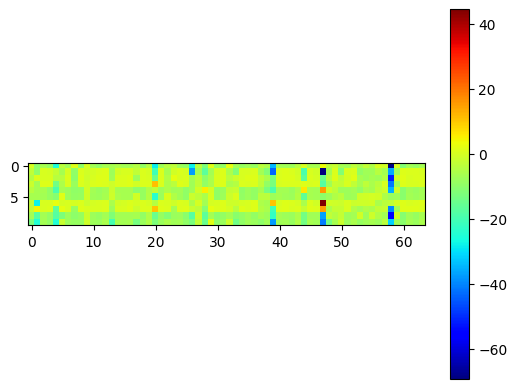

In [ ]:
#print("Max = ",np.max(net.w1)," Min = ",np.min(net.w1))
fig= plt.imshow(model.weights1,cmap='jet')
plt.colorbar(fig)
plt.show()

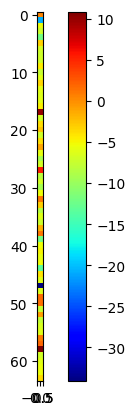

In [ ]:
import matplotlib.pyplot as plt
#print("Max = ",np.max(net.w1)," Min = ",np.min(net.w1))
fig= plt.imshow(model.weights2,cmap='jet')
plt.colorbar(fig)
plt.show()

Fold 1: Train Accuracy: 750.0, Test Accuracy: 250.0
Fold 2: Train Accuracy: 750.0, Test Accuracy: 250.0
Fold 3: Train Accuracy: 750.0, Test Accuracy: 250.0
Fold 4: Train Accuracy: 750.0, Test Accuracy: 250.0


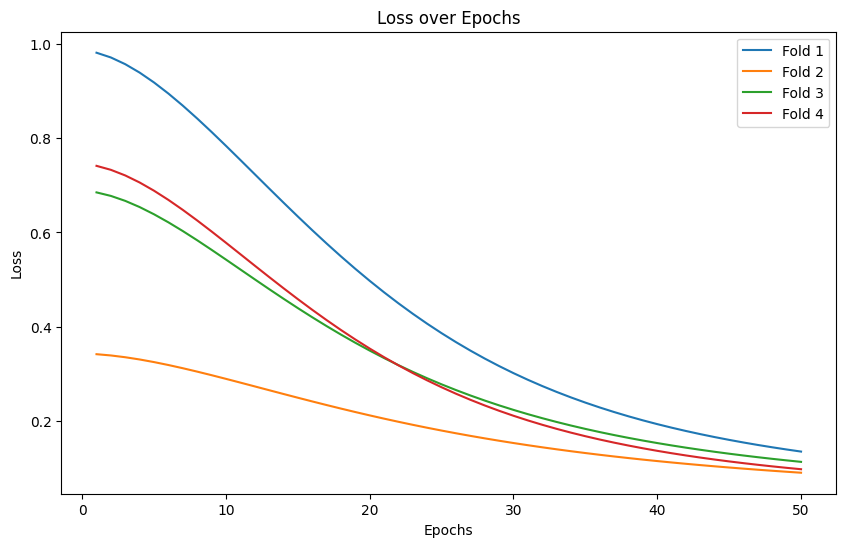

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Define data balancing function
def balance_data(X, y):
    num_positives = torch.sum(y == 1)
    num_negatives = torch.sum(y == 0)
    if num_positives > num_negatives:
        indices = torch.where(y == 0)[0]
        balanced_indices = torch.randperm(len(indices))[:num_positives]
        return torch.cat((X[y == 1], X[indices[balanced_indices]])), torch.cat((y[y == 1], y[indices[balanced_indices]]))
    elif num_negatives > num_positives:
        indices = torch.where(y == 1)[0]
        balanced_indices = torch.randperm(len(indices))[:num_negatives]
        return torch.cat((X[y == 0], X[indices[balanced_indices]])), torch.cat((y[y == 0], y[indices[balanced_indices]]))
    else:
        return X, y

# Define cross-validation function
def cross_validation(X, y, n_splits=4):
    kf = KFold(n_splits=n_splits, shuffle=True)
    for train_index, test_index in kf.split(X):
        yield X[train_index], y[train_index], X[test_index], y[test_index]

# Define a function to calculate recall, precision, and accuracy
def calculate_metrics(y_true, y_pred):
    true_positive = torch.sum((y_true == 1) & (y_pred == 1)).item()
    false_positive = torch.sum((y_true == 0) & (y_pred == 1)).item()
    true_negative = torch.sum((y_true == 0) & (y_pred == 0)).item()
    false_negative = torch.sum((y_true == 1) & (y_pred == 0)).item()

    recall = true_positive / (true_positive + false_negative+1e-6)
    precision = true_positive / (true_positive + false_positive+1e-6)
    accuracy = (true_positive + true_negative)/ len(y_true)

    return recall, precision, accuracy

# Generate synthetic data
np.random.seed(0)
X = torch.randint(2, (1000, 10)).float()
y = torch.tensor([int(str(x.tolist()) == str(x.tolist())[::-1]) for x in X]).float()  # Convert y to float

# Define model parameters
input_size = 10
hidden_size = 2
output_size = 1
lr = 0.01
momentum = 0.9
num_epochs = 50

# Define training parameters
kfolds = 4
losses = []

# Perform cross-validation
for fold, (train_X, train_y, test_X, test_y) in enumerate(cross_validation(X, y, kfolds), 1):
    # Data balancing
    train_X, train_y = balance_data(train_X, train_y)
    test_X, test_y = balance_data(test_X, test_y)

    # Initialize model, criterion, and optimizer
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    train_losses = []
    test_losses = []

    # Training loop
    for epoch in range(num_epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = model(train_X)
        loss = criterion(outputs, train_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Testing
        model.eval()
        with torch.no_grad():
            test_outputs = model(test_X)
            test_loss = criterion(test_outputs, test_y.unsqueeze(1))
            test_losses.append(test_loss.item())

    # Calculate metrics
    model.eval()
    with torch.no_grad():
        train_outputs = model(train_X)
        train_pred = torch.round(train_outputs)
        test_outputs = model(test_X)
        test_pred = torch.round(test_outputs)

    train_recall, train_precision, train_accuracy = calculate_metrics(train_y, train_pred)
    test_recall, test_precision, test_accuracy = calculate_metrics(test_y, test_pred)
    print(f"Fold {fold}: Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

    losses.append(test_losses)

# Plot losses
plt.figure(figsize=(10, 6))
for i, fold_loss in enumerate(losses):
    plt.plot(range(1, num_epochs + 1), fold_loss, label=f"Fold {i+1}")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


'''plot the cost function/
plt.grid()/
plt.plot(range(mlp.iterations),mlp.cost)/
plt.xlabel('Iterations')/
plt.ylabel('Cost')/
plt.title('BCE Cost Function')/
Print predictions, number of iterations and the ground truth labels./
print(f'\n The MLP predictions for each training example, based on {mlp.iterations} iterations are:\n\n{np.round(mlp.p_hats[-1],2)}')/
print('\n----------------------------------------------------------------------------')/
print(f'\n The ground truth Y labels are are:\n\n{Y}')'''

#finalcode

In [ ]:
#import required libaries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import pickle
from tqdm import tqdm_notebook
import copy

In [6]:
# Generate all possible 10-digit binary numbers
def generate_all_binary_numbers():
    binary_numbers = []
    for i in range(2 ** 10):
        binary_str = format(i, '010b')
        binary_numbers.append([int(bit) for bit in binary_str])
    return np.array(binary_numbers)

# Generate all possible binary numbers
all_binary_numbers = generate_all_binary_numbers()
np.random.shuffle(all_binary_numbers)
def is_palindrome(binary_number):
    return int(np.array_equal(binary_number, binary_number[::-1]))

labels = np.array([is_palindrome(x) for x in all_binary_numbers])

In [9]:
! mkdir history

Running...


<ipython-input-85-251a35931ed4>:135: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in  tqdm_notebook(range(self.epochs)):


  0%|          | 0/500 [00:00<?, ?it/s]

epoch: 0, precision: 0.8957055214723927, acc: 0.8467741935483871, recall: 0.7849462365591398, loss: 0.4095874718232283
Weights successfully saved to "history/fold_0_model.pkl"
Train_precision: 0.799366516459336, Train_accuracy: 0.8093655913978494, Train_recall: 0.8261989247311828, Train_loss: 0.47615337187772355,
fold:0, precision: 0.03292181069958848, acc: 0.08203125, recall:1.0, loss:2.4834221041591533 


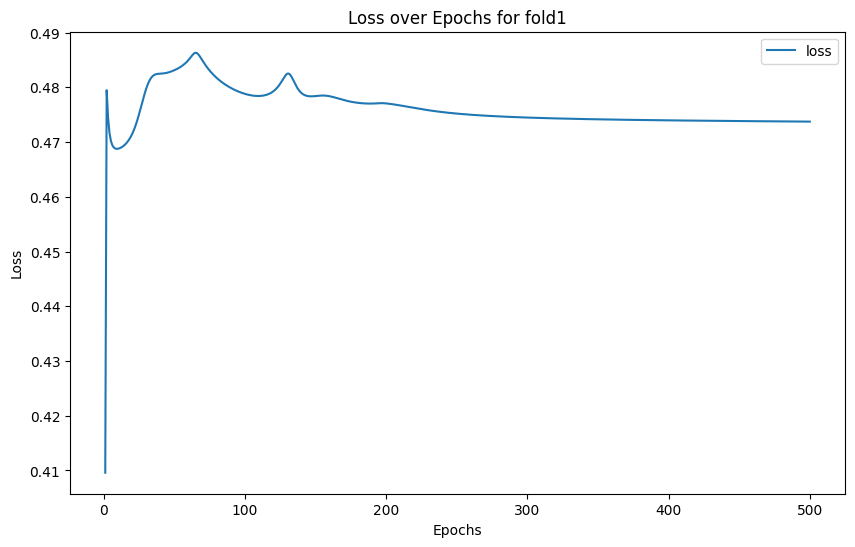

<ipython-input-85-251a35931ed4>:135: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in  tqdm_notebook(range(self.epochs)):


  0%|          | 0/500 [00:00<?, ?it/s]

epoch: 0, precision: 0.9250425894378195, acc: 0.8353494623655914, recall: 0.7298387096774194, loss: 0.4589459032140026
Weights successfully saved to "history/fold_1_model.pkl"
Train_precision: 0.8132093322429235, Train_accuracy: 0.8081317204301076, Train_recall: 0.8001612903225808, Train_loss: 0.48393267862639716,
fold:1, precision: 0.030303030303030304, acc: 0.12109375, recall:0.875, loss:2.5497476558672743 


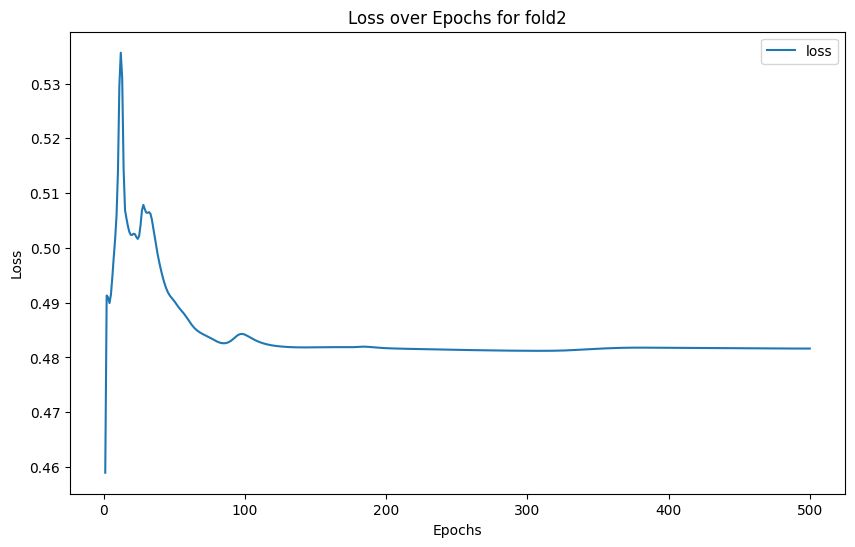

<ipython-input-85-251a35931ed4>:135: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in  tqdm_notebook(range(self.epochs)):


  0%|          | 0/500 [00:00<?, ?it/s]

epoch: 0, precision: 0.9851024208566108, acc: 0.8501344086021505, recall: 0.7110215053763441, loss: 0.4380346497753378
Weights successfully saved to "history/fold_2_model.pkl"
Train_precision: 0.8109197330193856, Train_accuracy: 0.8019758064516129, Train_recall: 0.7880967741935484, Train_loss: 0.500884179888508,
fold:2, precision: 0.031746031746031744, acc: 0.046875, recall:1.0, loss:2.7068477433951004 


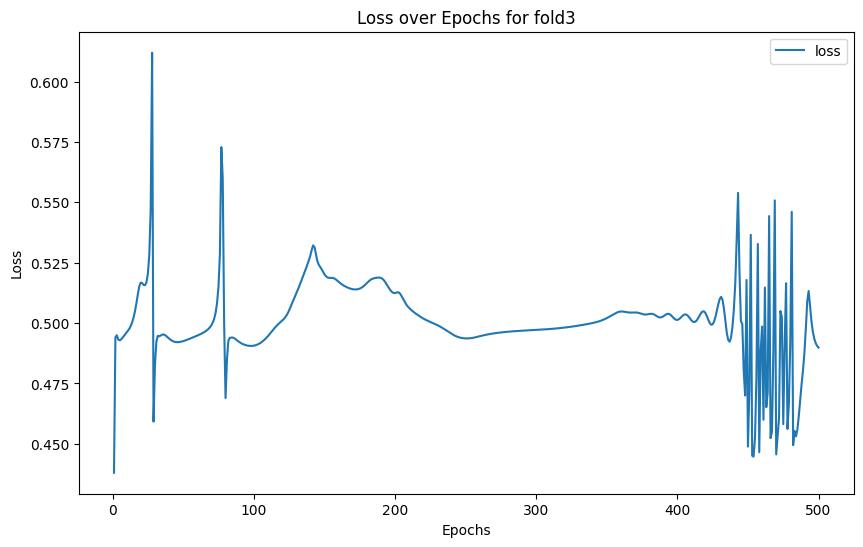

<ipython-input-85-251a35931ed4>:135: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in  tqdm_notebook(range(self.epochs)):


  0%|          | 0/500 [00:00<?, ?it/s]

epoch: 0, precision: 0.9758203799654577, acc: 0.8702956989247311, recall: 0.7594086021505376, loss: 0.41260368489321514
Weights successfully saved to "history/fold_3_model.pkl"
Train_precision: 0.8152551801538707, Train_accuracy: 0.8016021505376343, Train_recall: 0.7801075268817204, Train_loss: 0.502515802691822,
fold:3, precision: 0.037209302325581395, acc: 0.19140625, recall:1.0, loss:2.427239469279093 


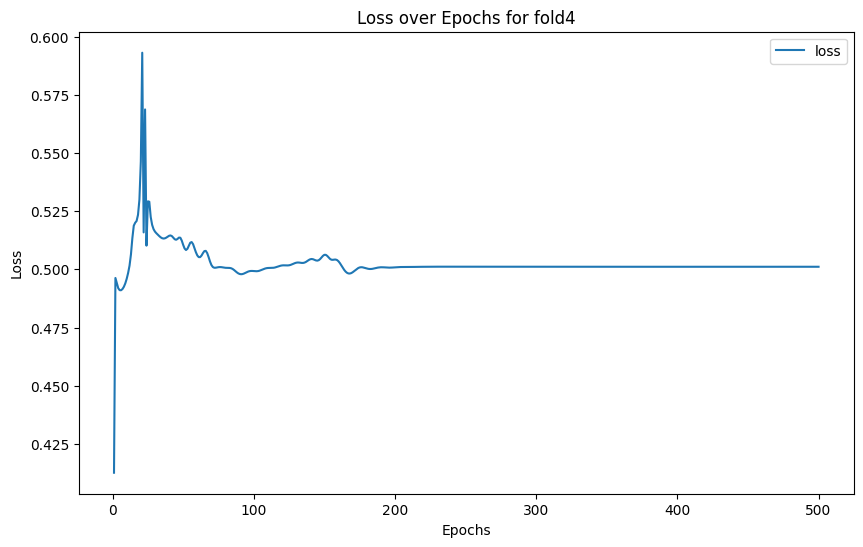

Training Complete
----------------------------------------------------------------------------


In [85]:
class MLP():

    """
    This is the MLP class used to feedforward and backpropagate the network across a defined number
    of iterations and produce predictions. After iteration the predictions are assessed using
    Binary Cross Entropy Cost function.
    """

    print('Running...')

    def __init__(self, X, Y, epochs=500, lr=1e-3, input_layer = 10,n_neurons = 2,output_layer =1,momentum=0.95,num_folds=4,batch_size=18):
        self.X= X#design matrix attibute
        self.epochs = epochs #iterations attibute
        self.lr = lr #learning rate attibute
        self.momentum = momentum
        self.input_layer = input_layer #input layer attibute
        self.n_neurons = n_neurons #hidden layer attibute
        self.output_layer = output_layer #output layer attibute
        min=-(1/np.sqrt(10))
        max=1/np.sqrt(10)
        self.w1 = np.random.uniform(min,max,size=(10, self.n_neurons)) #np.random.randn(self.input_layer, self.n_neurons)
        self.w2 = np.random.uniform(min,max,size=(self.n_neurons, self.output_layer))
        #self.w2 = #np.random.randn(self.n_neurons, self.output_layer)#weight attribute connecting to the output layer
        self.b1 = np.random.randn(1,self.n_neurons)
        self.b2 = np.random.randn(1,1)
        self.velocity_w1 = np.zeros_like(self.w1)
        self.velocity_w2 = np.zeros_like(self.w2)
        self.velocity_b1 = np.zeros_like(self.b1)
        self.velocity_b2 = np.zeros_like(self.b2)
        self.cost = [] #cost list attribute
        self.y_hats = [] #predictions list attribute
        self.acc=[]
        self.precision=[]
        self.recall=[]
        self.y_hats_test=[]
        self.acc_test=[]
        self.precision_test=[]
        self.recall_test=[]
        self.cost_test=[]
        self.acc_fold=[]
        self.precision_fold=[]
        self.recall_fold=[]
        self.acc_fold_test=[]
        self.precision_fold_test=[]
        self.recall_fold_test=[]
        self.total_cost=[]
        self.cost_fold=[]
        self.num_folds=num_folds
        self.Y = Y
        self.batch_size=batch_size

    def sigmoid(self, x): # sigmoid function used at the hidden layer and output layer
        #return 1 / (1 + np.exp(-x))
        return np.exp(-np.logaddexp(0, -x))

    def sigmoid_derivative(self, x): # sigmoid derivative used for backpropgation
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    def relu(self, x):
        return np.maximum(x,0)

    def relu_derivative(self,x):
      if x>0:
        return 1
      else:
        return 0
    def tanh(self,x):
         return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))


    def tanh_derivative(self,x):
         return 1 - self.tanh(x) * self.tanh(x)

    def forward_propagation(self,X):#define function to feedforward the network
        self.a_1 = X
        self.z_1 = self.w1.T @ self.a_1 #+ self.b1.T #linear transformation to the hidden layer
        self.a_2 = self.tanh(self.z_1) #hidden layer activation function
        self.z_2 = self.w2.T @self.a_2 #+ self.b2.T #linear transformation to the output layer
        self.y_hat = self.sigmoid(self.z_2) #output layer prediction
        return self.a_1,self.z_1, self.a_2, self.z_2, self.y_hat

    def BCECost(self, y, y_hat): # binary cross entropy cost function
        bce_cost = -(np.sum(y * np.log(y_hat+1e-6) + (1 - y) * np.log(1 - y_hat+1e-6)))
        return bce_cost

    def backword_prop(self, a_1,z_1, a_2 , z_2, y_hat,y): #backpropagation
        error = y_hat - y
        self.dw2 =  error @ self.a_2.T
        self.db2 = error
        self.dw1 = (self.w2 @ error * self.tanh_derivative(self.z_2)) @ self.a_1.T
        self.db1 = (self.w2 @ error * self.tanh_derivative(self.z_2))
        return self.dw1.T, self.dw2.T,self.db1.T,self.db2
    def inference(self,x_test,y_test,k):
      self.cost_test=[]
      self.y_hats_test=[]
      for i in range(x_test.shape[0]):
              a_1,z_1, a_2, z_2, y_hat = self.forward_propagation(x_test[i].reshape(-1,1))
              self.cost_test.append(self.BCECost(y_test[i].reshape(-1,1), y_hat))#store BCE costper sample in list
              self.y_hats_test.append([0 if y_hat<0.5 else 1])#store predictions in list
      print(f"fold:{k}, precision: {precision_score(y_test,self.y_hats_test,zero_division=0)}, acc: {accuracy_score(y_test,self.y_hats_test)}, recall:{recall_score(y_test,self.y_hats_test)}, loss:{np.mean(self.cost_test)} ")
      self.acc_test.append(accuracy_score(y_test,self.y_hats_test))
      self.precision_test.append(precision_score(y_test,self.y_hats_test,zero_division=0))
      self.recall_test.append(recall_score(y_test,self.y_hats_test))
    def plot(self,fold,cost,epoch):
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, epoch+1), cost,label="loss")
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title(f'Loss over Epochs for fold{fold+1}')
        plt.legend()
        plt.show()
    def reset(self):
        min=-(1/np.sqrt(10))
        max=1/np.sqrt(10)
        self.w1 = np.random.uniform(min,max,size=(10, self.n_neurons)) #np.random.randn(self.input_layer, self.n_neurons)
        self.w2 = np.random.uniform(min,max,size=(self.n_neurons, self.output_layer))
        self.b1 = np.random.randn(1,self.n_neurons)
        self.b2 = np.random.randn(1,1)
        self.velocity_w1 = np.zeros_like(self.w1)
        self.velocity_w2 = np.zeros_like(self.w2)
        self.velocity_b1 = np.zeros_like(self.b1)
        self.velocity_b2 = np.zeros_like(self.b2)


    def train(self):#train the network
        skf = StratifiedKFold(n_splits=4)
        ros = RandomOverSampler(sampling_strategy="not majority")
        for fold,(train_index, test_index) in enumerate(skf.split(self.X, self.Y)):
            x_train_unsampled, x_test = self.X[train_index], self.X[test_index]
            y_train_unsampled, y_test = self.Y[train_index], self.Y[test_index]
            x_train, y_train = ros.fit_resample(x_train_unsampled, y_train_unsampled) #ros.fit_resample(
            self.total_cost=[]
            self.acc=[]
            self.precision=[]
            self.recall=[]
            for epoch in  tqdm_notebook(range(self.epochs)):
              self.y_hats=[]
              self.cost=[]
              for i in range(x_train.shape[0]):
                      a_1,z_1, a_2, z_2, y_hat = self.forward_propagation(x_train[i].reshape(-1,1))# feedforward
                      dw1, dw2,db1,db2 = self.backword_prop(a_1,z_1, a_2, z_2, y_hat,y_train[i].reshape(-1,1))#backpropgate
                      self.velocity_w1 = self.momentum*self.velocity_w1 - self.lr*dw1
                      self.velocity_w2 = self.momentum*self.velocity_w2 - self.lr*dw2
                      self.velocity_b1 = self.momentum*self.velocity_b1 - self.lr*db1
                      self.velocity_b2 = self.momentum*self.velocity_b2 - self.lr*db2
                      self.w1 += self.velocity_w1#update weights connecting to the hidden layer (gradient descent)
                      self.w2 += self.velocity_w2#update weights connecting to the output layer (gradient descent )
                      self.b1 += self.velocity_b1
                      self.b2 += self.velocity_b2
                      self.cost.append(self.BCECost(y_train[i].reshape(-1,1), y_hat))#store BCE cost per sample in list
                      self.y_hats.append([0 if y_hat<0.5 else 1])#store predictions per sample in list
              self.acc.append(accuracy_score(y_train,self.y_hats))#store accuracy per epoch
              self.precision.append(precision_score(y_train,self.y_hats,zero_division=0))#store precision per epoch
              self.recall.append(recall_score(y_train,self.y_hats))#store recall per epoch
              self.total_cost.append(np.mean(self.cost))#store cost per epoch
              file_name_epoch = f'history/fold_{fold}.txt'
              with open(file_name_epoch,'a') as text_file:
                text_file.write(f'epoch: {epoch}, precision: {precision_score(y_train,self.y_hats,zero_division=0)}, acc: {accuracy_score(y_train,self.y_hats)}, recall: {recall_score(y_train,self.y_hats)}, loss: {np.mean(self.cost)}')
              if epoch%500==0:
                print(f"epoch: {epoch}, precision: {precision_score(y_train,self.y_hats,zero_division=0)}, acc: {accuracy_score(y_train,self.y_hats)}, recall: {recall_score(y_train,self.y_hats)}, loss: {np.mean(self.cost)}")
            file_name = f'history/fold_{fold}_model.pkl'
            model = copy.deepcopy(self)
            with open(file_name, 'wb') as file:
                pickle.dump(model, file)
                print(f'Weights successfully saved to "{file_name}"')
            print(f'Train_precision: {np.mean(self.precision)}, Train_accuracy: {np.mean(self.acc)}, Train_recall: {np.mean(self.recall)}, Train_loss: {np.mean(self.total_cost)},')
            self.inference(x_test,y_test,fold)
            self.plot(fold,self.total_cost,self.epochs)
            self.reset()






        print('Training Complete')
        print('----------------------------------------------------------------------------')

# Prepare the XOR Logic Gate data: create an array for each training example x feature, and an array for each corrosponding y label.
'''X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]]) #input features (4 x 2 design matrix)
Y = np.array([[1], [1], [0], [0]])#ground truth y labels (4x1)'''

mlp = MLP(all_binary_numbers,labels)#Pass data to the model (design matrix and y label)
mlp.train() #Train the model


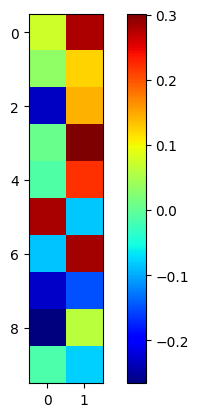

In [86]:
import matplotlib.pyplot as plt
#print("Max = ",np.max(net.w1)," Min = ",np.min(net.w1))
fig= plt.imshow(mlp.w1,cmap='jet')
plt.colorbar(fig)
plt.show()

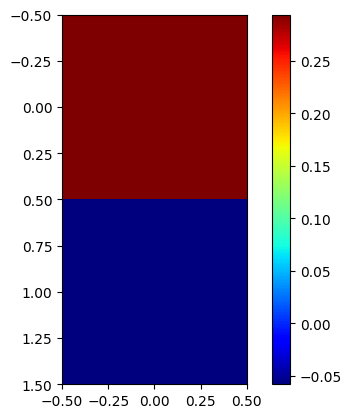

In [88]:
#print("Max = ",np.max(net.w1)," Min = ",np.min(net.w1))
fig= plt.imshow(mlp.w2,cmap='jet')
plt.colorbar(fig)
plt.show()

In [92]:
with open ('/content/history/fold_0_model.pkl', 'rb' ) as f:
  model = pickle.load(f)

In [94]:
_,_,_,_,pred = model.forward_propagation([1,1,1,1,1,1,1,1,1,1])
print([0 if pred<0.5 else 1])

[1]


In [95]:
!zip -r /content/history.zip /content/history

  adding: content/history/ (stored 0%)
  adding: content/history/fold_2.txt (deflated 88%)
  adding: content/history/fold_3.txt (deflated 88%)
  adding: content/history/fold_1_model.pkl (deflated 86%)
  adding: content/history/fold_0.txt (deflated 93%)
  adding: content/history/fold_0_model.pkl (deflated 87%)
  adding: content/history/fold_3_model.pkl (deflated 86%)
  adding: content/history/fold_2_model.pkl (deflated 85%)
  adding: content/history/fold_1.txt (deflated 88%)
